In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv(r'card_transdata.csv')

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [5]:
# VAMOS A HACER UN PAIR PLOT PARA VER SI LOS DATOS ESTÁN BIEN DIFERENCIADOS ENTRE CLASES.
# PARA MAYOR VELOCIDAD AL GRAFICAR, USAREMOS UN DF MUY PEQUEÑO.
# PARA ENTRENAR EL MODELO SE USARÁ UNO MÁS GRANDE
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.99,
                                                    random_state=0,
                                                    stratify=y)

In [6]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
441031,0.327722,0.397348,1.166316,0.0,1.0,0.0,0.0
184484,1.683886,0.116861,0.506436,0.0,0.0,0.0,0.0
78369,7.607553,0.738888,0.761869,1.0,0.0,0.0,0.0
357263,1.108523,1.733618,3.671705,0.0,0.0,0.0,1.0
471837,0.850045,0.021737,9.588839,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
473047,28.553773,0.286084,0.059013,1.0,0.0,0.0,1.0
325546,20.812526,1.764239,1.547906,1.0,1.0,1.0,0.0
411113,26.769482,0.095623,0.967359,1.0,1.0,0.0,1.0
912904,60.198141,0.346715,1.455550,1.0,0.0,1.0,0.0


In [7]:
y_train.value_counts()

0.0    9126
1.0     874
Name: fraud, dtype: int64

In [8]:
# DE IGUAL FORMA, SE ESCALARÁN LOS DATOS PARA VISUALIZAR MEJOR EL PAIR PLOT.
ss = StandardScaler()
xscaled = pd.DataFrame(ss.fit_transform(x_train),columns = x_train.columns)
xscaled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.410380,-0.246388,-0.238004,-2.720912,1.368782,-0.332963,-1.358289
1,-0.389187,-0.262087,-0.475042,-2.720912,-0.730577,-0.332963,-1.358289
2,-0.296616,-0.227271,-0.383287,0.367524,-0.730577,-0.332963,-1.358289
3,-0.398178,-0.171594,0.661967,-2.720912,-0.730577,-0.332963,0.736220
4,-0.402217,-0.267411,2.787483,-2.720912,1.368782,-0.332963,0.736220
...,...,...,...,...,...,...,...
9995,0.030717,-0.252615,-0.635763,0.367524,-0.730577,-0.332963,0.736220
9996,-0.090258,-0.169880,-0.100932,0.367524,1.368782,3.003338,-1.358289
9997,0.002834,-0.263276,-0.309473,0.367524,1.368782,-0.332963,0.736220
9998,0.525233,-0.249222,-0.134107,0.367524,-0.730577,3.003338,-1.358289


array([[<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='distance_from_last_transaction', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='repeat_retailer', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='used_chip', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='used_pin_number', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='online_order', ylabel='distance_from_home'>],
       [<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_last_transaction'>,
        <AxesSubplot:xlabel='distance_from_last_transaction', ylabel='distance_from_last_transaction'>,
        <AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='distance_from_last_transaction'>,
        <AxesSubplot:xlabel='repeat_retailer', ylabel='distance_from_last_transaction'>,
        <AxesSubplot:xlabel='used_chip', ylabel

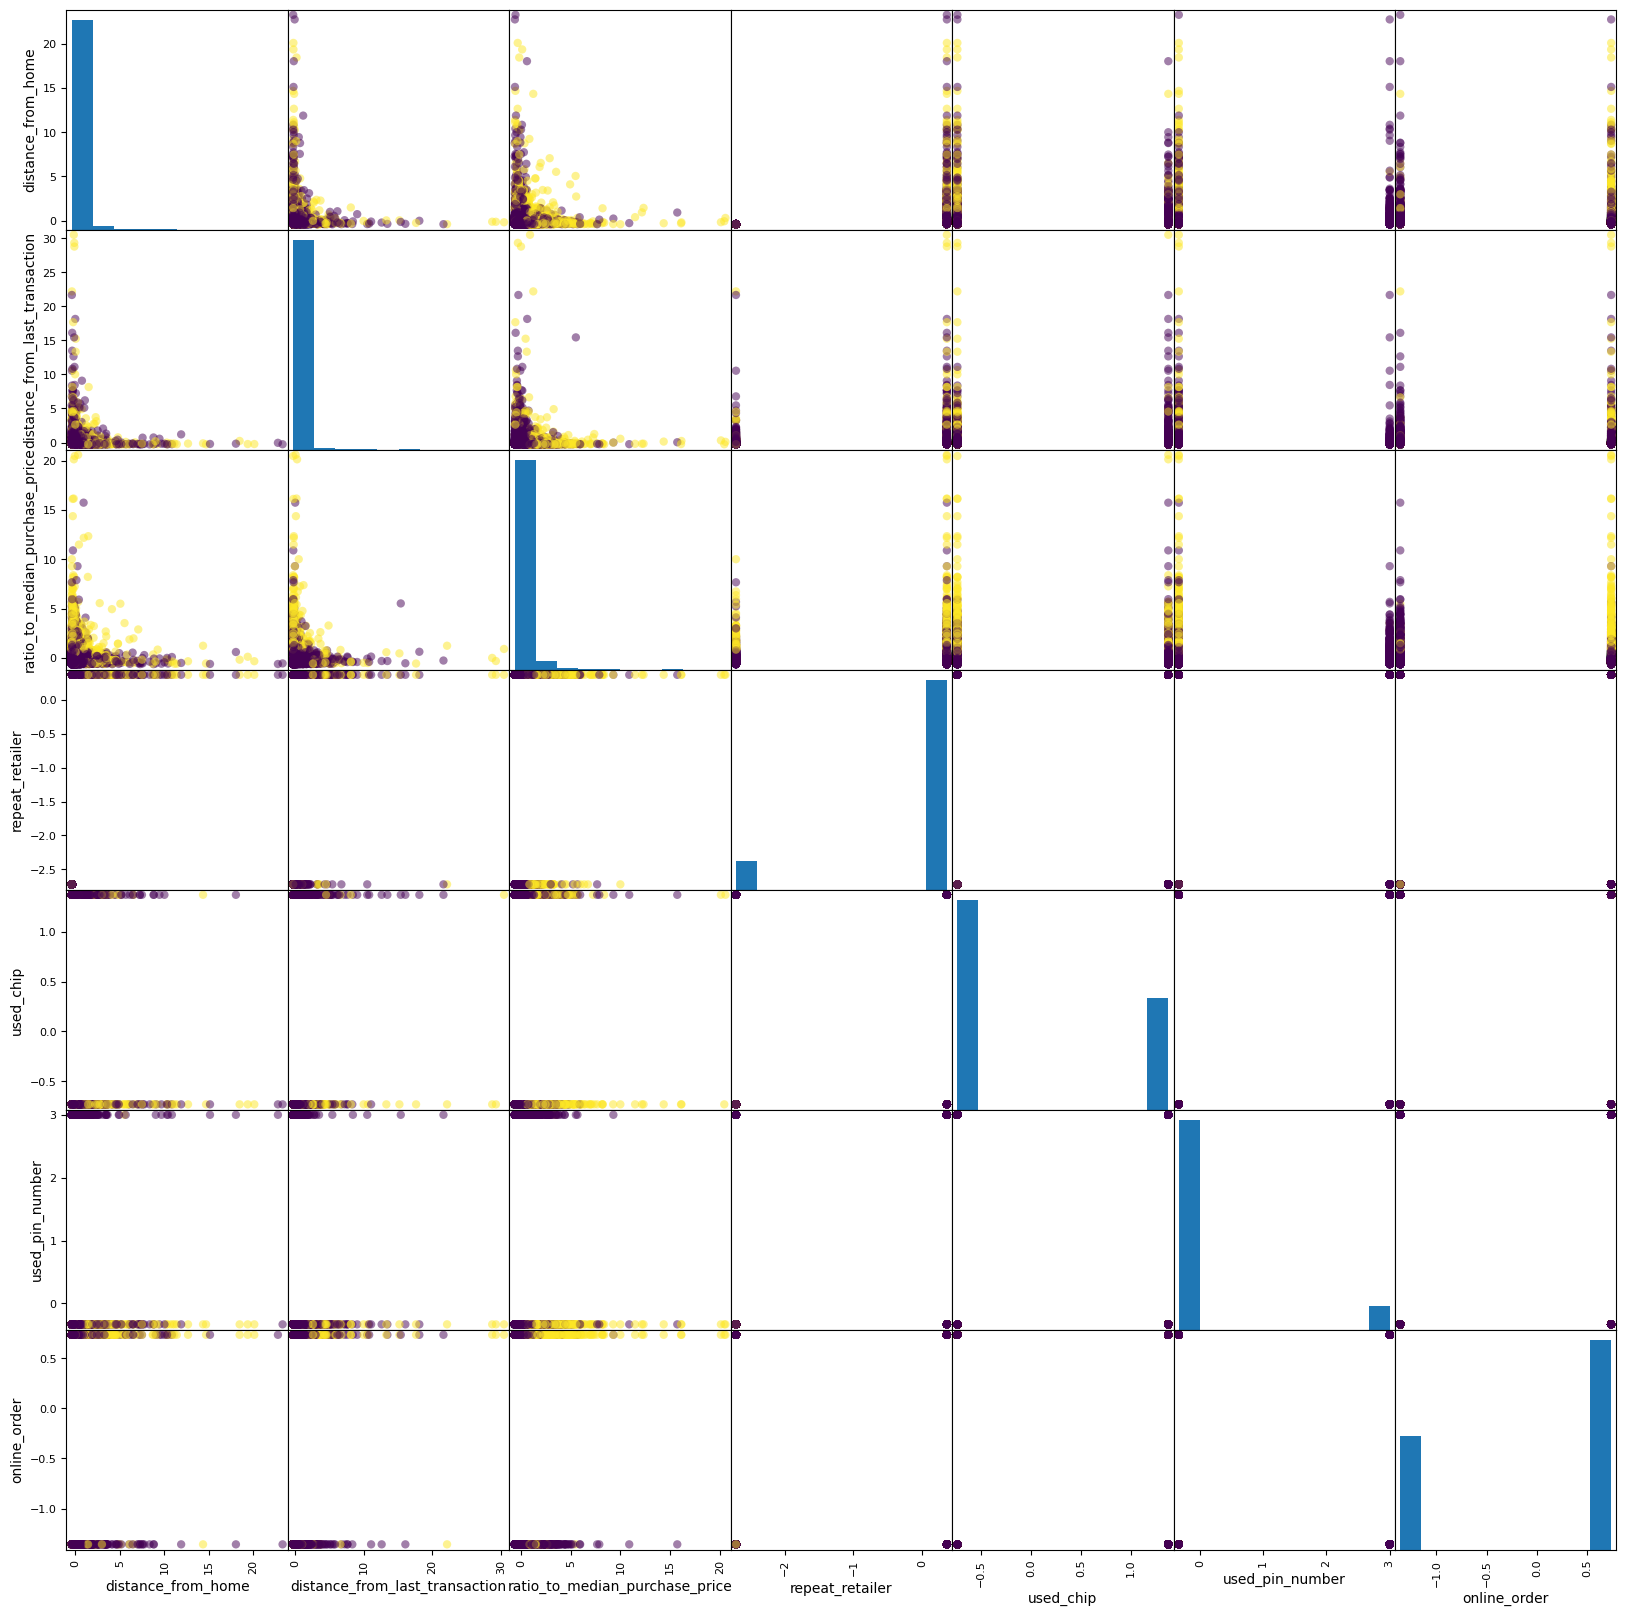

In [9]:
# LAS CLASES PARECEN ESTAR BIEN SEPARADAS PARA ALGUNAS VARIABLES POR LO QUE ES VIABLE HACER UN MODELO DE CLASIFICACIÓN.
pd.plotting.scatter_matrix(xscaled, c=y_train, figsize=(20,20),
                           marker='o', )

# CONTINUAMOS ANALIZANDO LOS DATOS, ESTA VEZ CON LA TOTALIDAD DE LOS MISMOS.

In [10]:
# Para saber cual es la proporción de la variable target
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [11]:
# Para saber nulos 
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


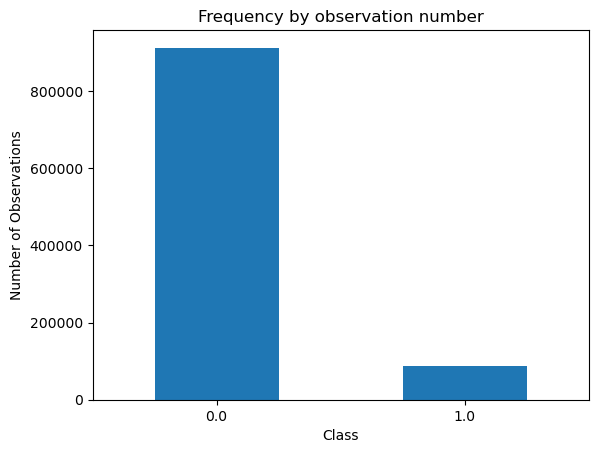

In [12]:
count_classes = pd.value_counts(df['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

# Propuestas 

1. Trabajar con dataset total. (1MM de registros, proporción variable target 90-10)
2. Seleccionar menor cantidad de registros y buscando una proporción de la variable target 70-30, para tener el datasets menos desbalanceado. Según cálculos , se debería extraer una muestra de 291343 datos totales. 


A partir de la selección del dataset: 

1. Aplicar los siguientes modelos sobre el conjunto de datos: 

   1.a. KNN. (Carlos)

   1.b. Naives Bayes. (Santiago)
   
   1.c. Regresión Logística. (moises) 

In [13]:
# Dataset de sólo no fraude 
df_nf = df.loc[df['fraud'] == 0]
df_nf.fraud.value_counts()
df_nf2 = df_nf.sample(203940)
print(df_nf2.fraud.value_counts())

# Generar otro dataset con los registros de fraude 
df_f = df.loc[df['fraud'] == 1]
df_f.fraud.value_counts()


0.0    203940
Name: fraud, dtype: int64


1.0    87403
Name: fraud, dtype: int64

In [14]:
definitivo = pd.merge(df_nf2, df_f, how = 'outer')
definitivo.fraud.value_counts()

display(definitivo.sample(10))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
196276,26.512779,0.155250,1.549885,1.0,1.0,0.0,1.0,0.0
177890,3.816944,0.547300,0.024324,1.0,1.0,0.0,0.0,0.0
36623,15.050728,0.005300,1.641927,1.0,0.0,0.0,1.0,0.0
49242,2.665920,1.276319,1.881725,1.0,0.0,0.0,0.0,0.0
85552,6.949046,5.760558,0.245938,1.0,0.0,0.0,1.0,0.0
137247,0.572417,0.375724,0.661925,0.0,1.0,1.0,0.0,0.0
134743,37.296682,1.810095,0.628136,1.0,0.0,0.0,1.0,0.0
83929,22.345612,21.561095,1.030160,1.0,1.0,0.0,1.0,0.0
254143,7.102661,1.118765,4.277837,1.0,0.0,0.0,1.0,1.0
223145,52.224540,3.329096,5.901130,1.0,0.0,0.0,1.0,1.0


# NAIVE BAYES (TODOS LOS DATOS)

In [15]:
# VOLVEMOS A SEPARAR EN TRAIN Y TEST PERO ESTA VEZ
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=y)

In [16]:
model1 = GaussianNB()
model1.fit(x_train, y_train);                                                  

In [17]:
model2 = MultinomialNB()

model2.fit(x_train, y_train)

MultinomialNB()

In [18]:
y_pred_gnb = model1.predict(x_test)
y_pred_mnb = model2.predict(x_test)

In [19]:
print (f'Accuracy para modelo gaussiano: {accuracy_score(y_pred_gnb,y_test)}')
print (f'Accuracy para modelo multinomial: {accuracy_score(y_pred_mnb,y_test)}')

Accuracy para modelo gaussiano: 0.951948
Accuracy para modelo multinomial: 0.9204


Text(0.5, 1.0, 'GaussianNB')

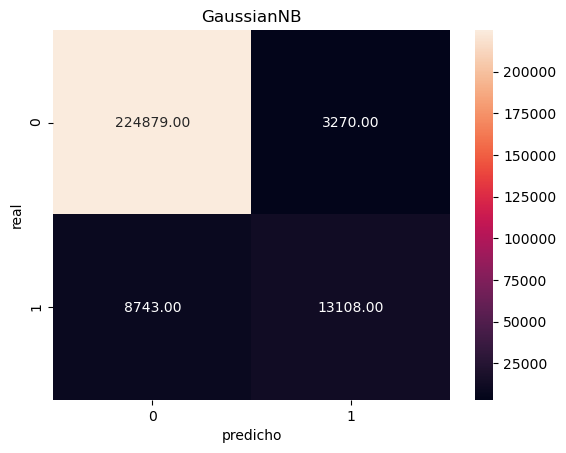

In [20]:
g = sns.heatmap(confusion_matrix(y_test,model1.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

Text(0.5, 1.0, 'MultinomialNB')

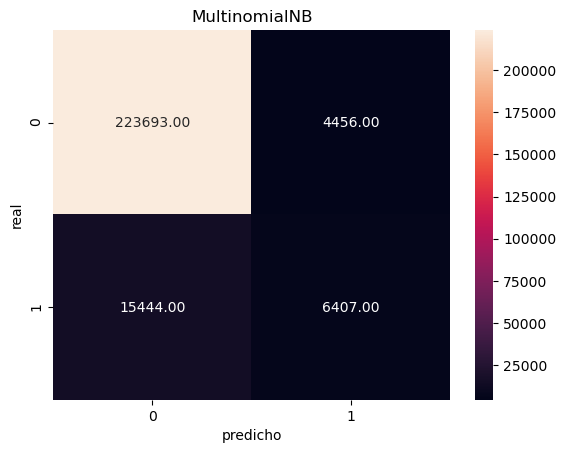

In [21]:
g = sns.heatmap(confusion_matrix(y_test,model2.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')

# NAIVE BAYES (BALANCEADO)

In [22]:
X = definitivo.iloc[:, 0:-1]
y = definitivo.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=y)

In [23]:
model1 = GaussianNB()
model1.fit(x_train, y_train);  

In [24]:
model2 = MultinomialNB()

model2.fit(x_train, y_train)

MultinomialNB()

In [25]:
y_pred_gnb = model1.predict(x_test)
y_pred_mnb = model2.predict(x_test)

In [26]:
print (f'Accuracy para modelo gaussiano: {accuracy_score(y_pred_gnb,y_test)}')
print (f'Accuracy para modelo multinomial: {accuracy_score(y_pred_mnb,y_test)}')

Accuracy para modelo gaussiano: 0.9502718435938272
Accuracy para modelo multinomial: 0.8508429897303531


Text(0.5, 1.0, 'GaussianNB')

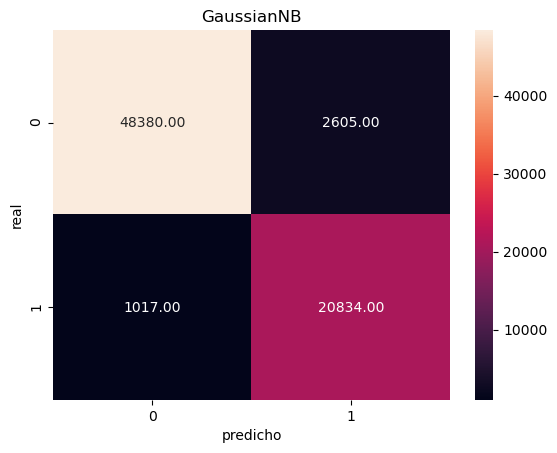

In [27]:
g = sns.heatmap(confusion_matrix(y_test,model1.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

Text(0.5, 1.0, 'MultinomialNB')

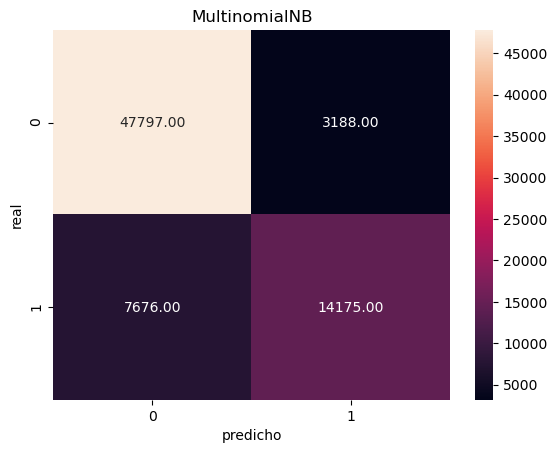

In [28]:
g = sns.heatmap(confusion_matrix(y_test,model2.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')